#Nama : Nabila Anilda Zahrah
#NIM  : 122450063
#Tugas 3 Visualisasi Data

# Dataset yang digunakan : *Global Country Information Dataset 2023*

1. **Tujuan**

Menganalisis dan Membandingkan Indikator Ekonomi: Visualisasi bertujuan untuk menunjukkan hubungan antara PDB (GDP), tingkat pengangguran, dan CPI (Indeks Harga Konsumen) di berbagai negara. Ini akan membantu pengguna untuk memahami kondisi ekonomi di berbagai negara dan bagaimana ketiga variabel ini saling berhubungan.

2.**User**

Peneliti dan Analis Ekonomi: Mereka yang bekerja di bidang ekonomi dan analisis data akan menggunakan visualisasi ini untuk mendapatkan wawasan tentang tren ekonomi global.
Mahasiswa dan Akademisi: Mahasiswa yang belajar tentang ekonomi akan dapat menggunakan visualisasi ini sebagai referensi dalam studi mereka.
Pengambil Kebijakan: Pembuat kebijakan akan dapat memahami dampak dari pengangguran dan inflasi terhadap pertumbuhan ekonomi saat merumuskan kebijakan.

3. **Fungsi**

Memberikan Insight: Visualisasi akan memberikan insight tentang bagaimana negara-negara dengan PDB tinggi bisa memiliki tingkat pengangguran yang berbeda dan bagaimana inflasi mempengaruhi kondisi ekonomi.
Perbandingan Cepat: Fungsi visualisasi ini memungkinkan perbandingan yang cepat dan jelas antara indikator-indikator ekonomi di berbagai negara.

4. **Tone**

Profesional dan Informatif: Tone visualisasi ini akan bersifat profesional, dengan fokus pada penyampaian data yang akurat dan jelas.
Data-Driven: Visualisasi akan mengutamakan data, dengan penggunaan warna dan ukuran yang merepresentasikan informasi penting secara visual, sehingga pengguna dapat dengan mudah mencerna informasi yang disampaikan.

1. Membersihkan data

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/economy word.csv')  # Sesuaikan path file

# Membersihkan data
data_cleaned = data[['Country', 'CPI', 'GDP', 'Population', 'Unemployment rate']].copy()

# Menghapus simbol yang tidak diperlukan dan mengubah tipe data
data_cleaned['GDP'] = pd.to_numeric(data_cleaned['GDP'].str.replace('[\$,]', '', regex=True), errors='coerce')
data_cleaned['Unemployment rate'] = pd.to_numeric(data_cleaned['Unemployment rate'].str.replace('%', ''), errors='coerce')
data_cleaned['CPI'] = pd.to_numeric(data_cleaned['CPI'], errors='coerce')
data_cleaned['Population'] = pd.to_numeric(data_cleaned['Population'].str.replace(',', ''), errors='coerce')

# Menghapus baris yang memiliki nilai kosong (NaN)
data_cleaned.dropna(subset=['GDP', 'Unemployment rate', 'CPI'], inplace=True)

# Menampilkan data bersih
print(data_cleaned.head())



       Country     CPI           GDP  Population  Unemployment rate
0  Afghanistan  149.90  1.910135e+10  38041754.0              11.12
1      Albania  119.05  1.527808e+10   2854191.0              12.33
2      Algeria  151.36  1.699882e+11  43053054.0              11.70
4       Angola  261.73  9.463542e+10  31825295.0               6.89
6    Argentina  232.75  4.496634e+11  44938712.0               9.79


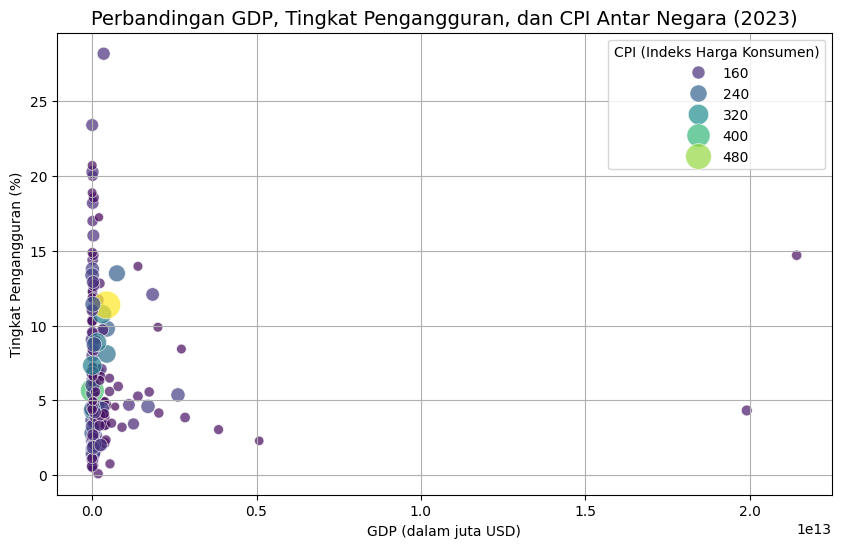

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat scatter plot dengan GDP, Unemployment rate, dan CPI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Unemployment rate', size='CPI', data=data_cleaned, hue='CPI', sizes=(40, 400), palette="viridis", alpha=0.7)
plt.title('Perbandingan GDP, Tingkat Pengangguran, dan CPI Antar Negara (2023)', fontsize=14)
plt.xlabel('GDP (dalam juta USD)')
plt.ylabel('Tingkat Pengangguran (%)')
plt.legend(title='CPI (Indeks Harga Konsumen)', loc='upper right')
plt.grid(True)
plt.show()


1. Visualisasi Scatter Plot

Scatter plot ini menunjukkan hubungan antara GDP dan tingkat pengangguran, dengan ukuran titik merepresentasikan CPI.

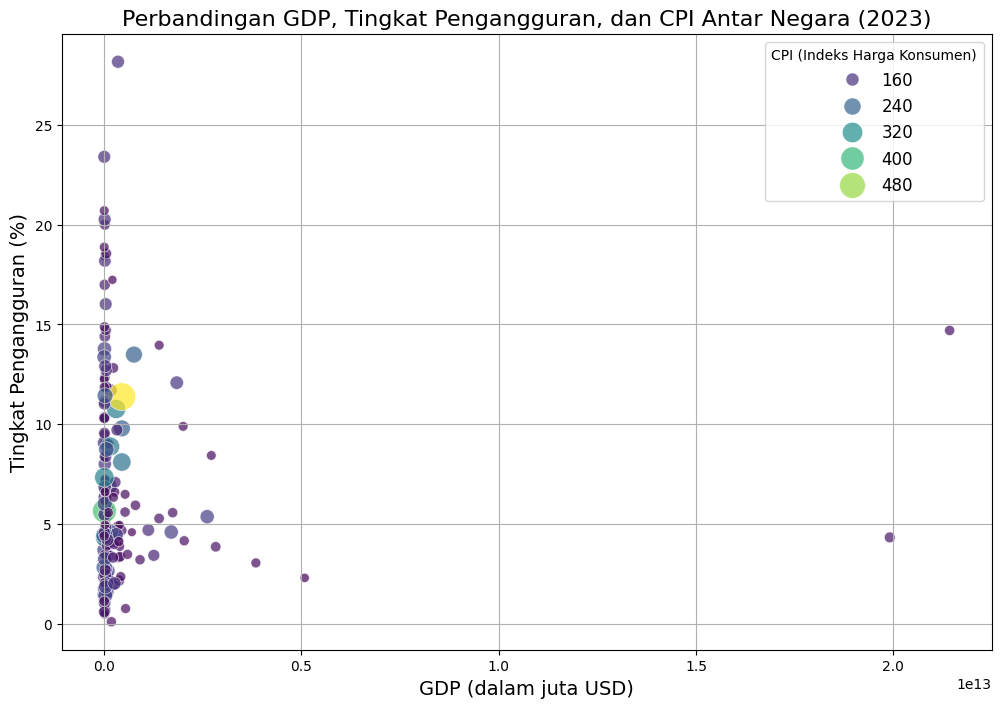

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/economy word.csv')  # Sesuaikan path file

# Clean the data
data_cleaned = data[['Country', 'CPI', 'GDP', 'Population', 'Unemployment rate']].copy()
data_cleaned['GDP'] = pd.to_numeric(data_cleaned['GDP'].str.replace('[\$,]', '', regex=True), errors='coerce')
data_cleaned['Unemployment rate'] = pd.to_numeric(data_cleaned['Unemployment rate'].str.replace('%', ''), errors='coerce')
data_cleaned['CPI'] = pd.to_numeric(data_cleaned['CPI'], errors='coerce')
data_cleaned['Population'] = pd.to_numeric(data_cleaned['Population'].str.replace(',', ''), errors='coerce')
data_cleaned.dropna(subset=['GDP', 'Unemployment rate', 'CPI'], inplace=True)

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_cleaned, x='GDP', y='Unemployment rate', size='CPI', hue='CPI',
                sizes=(40, 400), palette='viridis', alpha=0.7)
plt.title('Perbandingan GDP, Tingkat Pengangguran, dan CPI Antar Negara (2023)', fontsize=16)
plt.xlabel('GDP (dalam juta USD)', fontsize=14)
plt.ylabel('Tingkat Pengangguran (%)', fontsize=14)
plt.legend(title='CPI (Indeks Harga Konsumen)', loc='upper right', fontsize=12)
plt.grid(True)
plt.show()


2. Visualisasi Bar Chart

Bar chart yang menunjukkan PDB dan tingkat pengangguran untuk beberapa negara terpilih.

<ipython-input-6-cb5cf96e09cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Country', y='GDP', data=top_countries, palette='Blues_d')


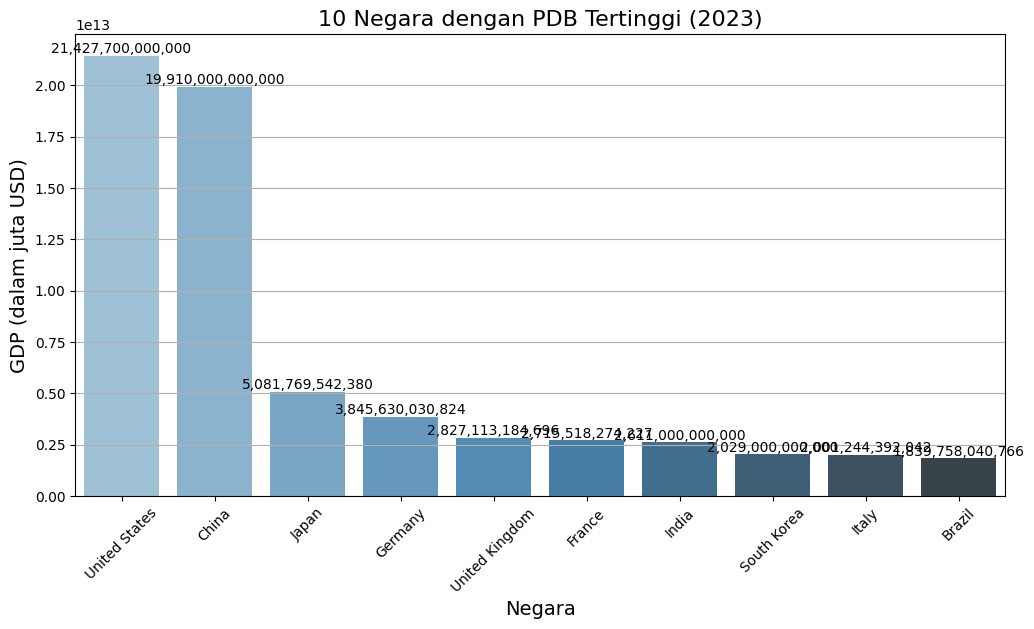

In [6]:
# Select top 10 countries by GDP for the bar chart
top_countries = data_cleaned.nlargest(10, 'GDP')

# Create bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Country', y='GDP', data=top_countries, palette='Blues_d')
plt.title('10 Negara dengan PDB Tertinggi (2023)', fontsize=16)
plt.xlabel('Negara', fontsize=14)
plt.ylabel('GDP (dalam juta USD)', fontsize=14)

# Add value labels on top of bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), ',.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'bottom', fontsize=10)

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('bar_chart.png')  # Simpan visualisasi
plt.show()


3. Visualisasi Heatmap

Heatmap untuk menunjukkan hubungan antara CPI, PDB, dan tingkat pengangguran.

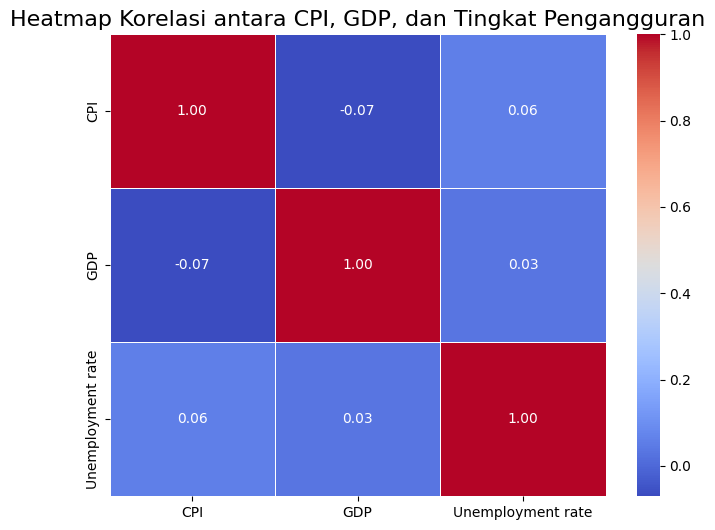

In [7]:
# Prepare data for heatmap
heatmap_data = data_cleaned[['CPI', 'GDP', 'Unemployment rate']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi antara CPI, GDP, dan Tingkat Pengangguran', fontsize=16)
plt.show()


Berikut adalah interpretasi dari masing-masing hasil visualisasi yang telah dibuat:

### 1. **Scatter Plot**
**Interpretasi:**
- **Hubungan antara GDP dan Tingkat Pengangguran**: Dari visualisasi ini, kita dapat melihat pola umum bahwa negara dengan GDP yang lebih tinggi cenderung memiliki tingkat pengangguran yang lebih rendah. Namun, terdapat pengecualian, di mana beberapa negara dengan GDP tinggi masih memiliki tingkat pengangguran yang cukup tinggi.
- **Ukuran Titik sebagai Indikator CPI**: Ukuran titik yang menunjukkan CPI (Indeks Harga Konsumen) memberikan informasi tambahan tentang inflasi. Negara dengan CPI tinggi mungkin menunjukkan bahwa meskipun GDP mereka tinggi, inflasi juga tinggi, yang dapat mempengaruhi daya beli masyarakat.
- **Analisis Perbandingan**: Visualisasi ini memungkinkan pengguna untuk membandingkan beberapa negara secara langsung, sehingga mempermudah identifikasi outlier atau negara yang tidak mengikuti pola umum.

### 2. **Bar Chart**
**Interpretasi:**
- **Negara dengan PDB Tertinggi**: Dari bar chart ini, pengguna dapat dengan mudah melihat sepuluh negara dengan PDB tertinggi. Negara-negara seperti Amerika Serikat, Cina, dan Jepang mendominasi grafik, yang mencerminkan posisi mereka dalam ekonomi global.
- **Pentingnya PDB**: Bar chart ini memberikan gambaran jelas tentang skala ekonomi setiap negara, dan dapat digunakan untuk membandingkan kekuatan ekonomi antara negara. Ini juga membantu memahami kontribusi negara-negara besar terhadap ekonomi global.
- **Penggunaan Value Labels**: Dengan adanya label nilai di atas setiap bar, pengguna dapat dengan cepat mendapatkan informasi numerik tentang PDB tanpa harus melihat sumbu Y, meningkatkan keterbacaan.

### 3. **Heatmap**
**Interpretasi:**
- **Korelasi antara Indikator**: Heatmap menunjukkan korelasi antara CPI, GDP, dan tingkat pengangguran. Nilai korelasi yang mendekati 1 menunjukkan hubungan positif yang kuat, sementara nilai mendekati -1 menunjukkan hubungan negatif.
  - **Korelasi antara GDP dan Tingkat Pengangguran**: Jika korelasi negatif teridentifikasi antara GDP dan tingkat pengangguran, ini mengkonfirmasi temuan dari scatter plot bahwa PDB yang lebih tinggi berhubungan dengan pengangguran yang lebih rendah.
  - **CPI dan GDP**: Jika ada korelasi positif antara CPI dan GDP, ini menunjukkan bahwa inflasi mungkin meningkat seiring dengan pertumbuhan ekonomi, yang merupakan hal yang umum dalam ekonomi.
- **Pengambilan Keputusan**: Heatmap ini berguna bagi pembuat kebijakan dan peneliti untuk melihat bagaimana perubahan dalam satu indikator dapat mempengaruhi yang lain, sehingga membantu dalam pengambilan keputusan dan perencanaan kebijakan ekonomi.

### Kesimpulan
Secara keseluruhan, ketiga visualisasi ini bersama-sama memberikan wawasan yang komprehensif tentang kondisi ekonomi global. Mereka memungkinkan pengguna untuk menganalisis dan memahami hubungan kompleks antara berbagai indikator ekonomi, mendukung keputusan berbasis data. Jika ada aspek lain yang ingin kamu eksplorasi atau pertajam, silakan beri tahu!